In [159]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from scipy.stats import  ttest_rel

import math

# Problem - 1

In [27]:
df=pd.read_csv('Wholesale Customer.csv')

In [28]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [29]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [30]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [31]:
df['Total_Spends']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [32]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spends
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [33]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [34]:
ct_region_channel=pd.crosstab(df['Region'],df['Channel'],margins=True)
ct_region_channel

Channel,Hotel,Retail,All
Region,,,
Lisbon,59,18,77
Oporto,28,19,47
Other,211,105,316
All,298,142,440


## Question Number 1.1

# Which Region and which Channel seems to spend more?
# Which Region and which Channel seems to spend less?


### By Channel

In [68]:
pd.DataFrame(df['Channel'].value_counts())

,Channel
Hotel,298
Retail,142


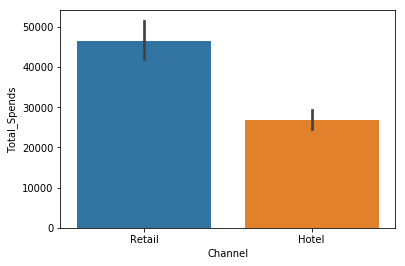

In [39]:
sns.barplot(x=df['Channel'],y=df['Total_Spends'],estimator=np.mean)

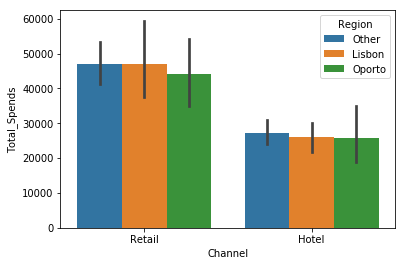

In [40]:
sns.barplot(x=df['Channel'],y=df['Total_Spends'],hue=df['Region'],estimator=np.mean)

## Although total spend by Hotel channel is more in absolute terms, however on the average Hotel Channel spends less than the Retail Channel.

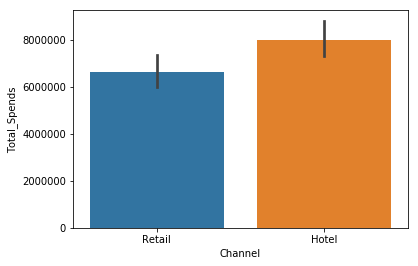

In [41]:
sns.barplot(x=df['Channel'],y=df['Total_Spends'],estimator=np.sum)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [42]:
pd.pivot_table(df,'Total_Spends',index=['Channel','Region'], aggfunc=np.mean)

Total_Spends
Channel Region              
Hotel   Lisbon  26073.593220
        Oporto  25683.928571
        Other   27213.635071
Retail  Lisbon  47137.277778
        Oporto  43996.736842
        Other   47004.971429

In [67]:
pd.pivot_table(df,'Total_Spends',index=['Channel'], aggfunc=np.mean).sort_values(by=['Total_Spends'],ascending=False)

,Total_Spends
Channel,
Retail,46619.232394
Hotel,26844.191275


## By Region

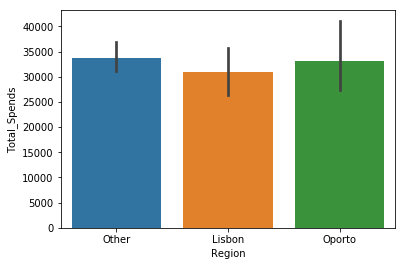

In [44]:
sns.barplot(x=df['Region'],y=df['Total_Spends'],estimator=np.mean)

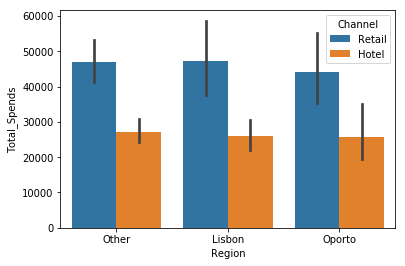

In [45]:
sns.barplot(x=df['Region'],y=df['Total_Spends'],hue=df['Channel'],estimator=np.mean)

## In absolute terms others region spends more, On the average also Other region seems to spend the most, however it is very close to Oporto.

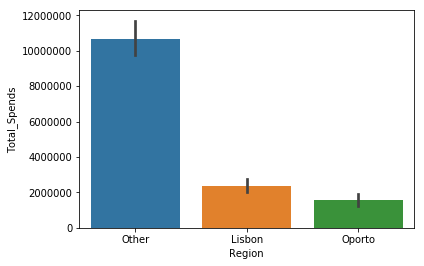

In [48]:
sns.barplot(x=df['Region'],y=df['Total_Spends'],estimator=np.sum)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [66]:
pd.pivot_table(df,'Total_Spends',index=['Region','Channel'], aggfunc=np.mean)

Total_Spends
Region Channel              
Lisbon Hotel    26073.593220
       Retail   47137.277778
Oporto Hotel    25683.928571
       Retail   43996.736842
Other  Hotel    27213.635071
       Retail   47004.971429

In [69]:
pd.DataFrame(df['Region'].value_counts())

,Region
Other,316
Lisbon,77
Oporto,47


In [64]:
pd.pivot_table(df,'Total_Spends',index=['Region'], aggfunc=np.mean).sort_values(by=['Total_Spends'],ascending=False)

,Total_Spends
Region,
Other,33789.870253
Oporto,33086.978723
Lisbon,30997.571429


## Question Number 1.2

## Do all varieties show similar behaviour across Region and Channel?



In [13]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spends
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [48]:
lst=[]

for i in df.drop(['Buyer/Spender','Channel','Region'],axis=1).columns:
    print(i)
    lst.append(df[i].mean()/df[i].std())
lst

Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicatessen
Total_Spends


[0.9488404907702831,
 0.7853617466952768,
 0.8366979936898232,
 0.6327782752256628,
 0.6043584621348489,
 0.5407138910419294,
 1.260652450564075]

In [432]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spends
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [75]:
df1=pd.melt(df[df.drop(['Buyer/Spender','Channel','Total_Spends'],axis=1).columns],id_vars='Region',
            var_name='Variety',value_name='Spend')
df1.head()

,Region,Variety,Spend
0,Other,Fresh,12669
1,Other,Fresh,7057
2,Other,Fresh,6353
3,Other,Fresh,13265
4,Other,Fresh,22615


E:\Python\envs\python3env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


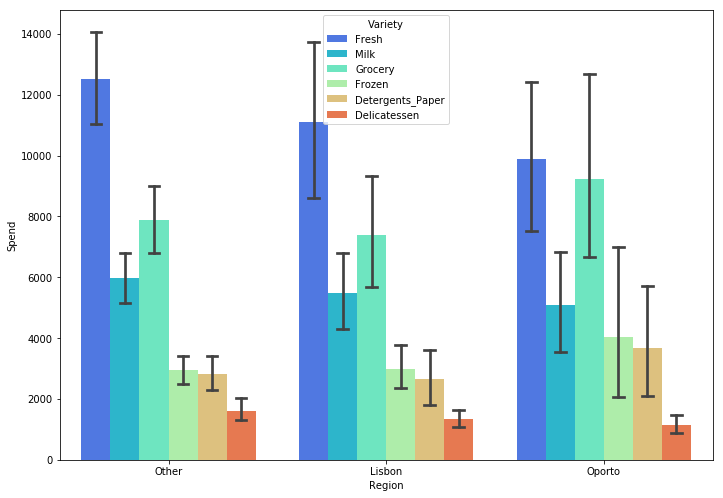

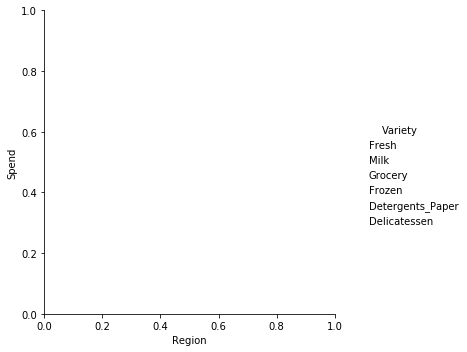

In [72]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.factorplot(ax=ax,x='Region', y='Spend', hue='Variety', data=df1, kind='bar',
               legend=True,estimator=np.mean,palette='rainbow',ci=95,capsize=0.05)

In [73]:
#Dropping categorical columns which are not required and moulding the df to plot a factorplot.
df2=pd.melt(df[df.drop(['Buyer/Spender','Region','Total_Spends'],axis=1).columns],
            id_vars='Channel',var_name='Variety',value_name='Spend')
df2.head()

,Channel,Variety,Spend
0,Retail,Fresh,12669
1,Retail,Fresh,7057
2,Retail,Fresh,6353
3,Hotel,Fresh,13265
4,Retail,Fresh,22615


E:\Python\envs\python3env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


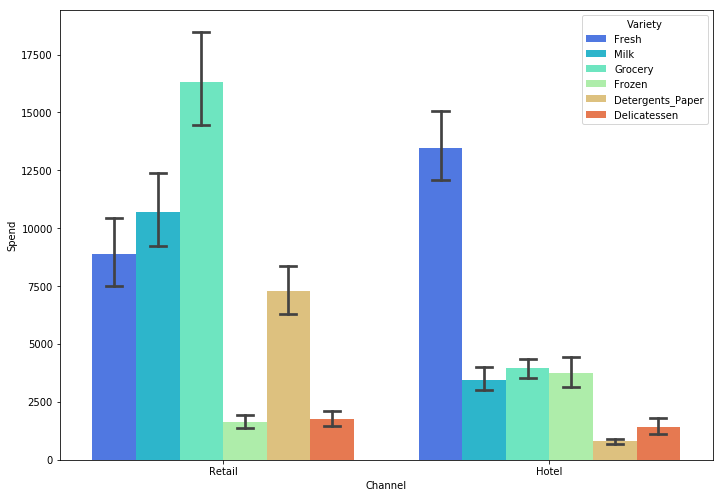

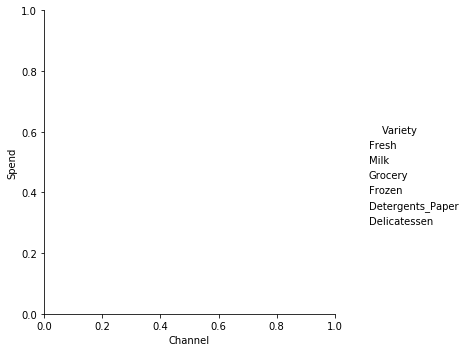

In [431]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.factorplot(ax=ax,x='Channel', y='Spend', hue='Variety', data=df2, kind='bar',
               legend=True,estimator=np.mean,palette='rainbow',ci=95,capsize=0.05)

## Question 1.3

## Which items shows the least inconsistent behaviour?

In [76]:
CTEs=[]
error=[]
labels=df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns
x_pos = np.arange(len(labels))
for i in labels:
    CTEs.append(df[i].mean())
    error.append(df[i].std())

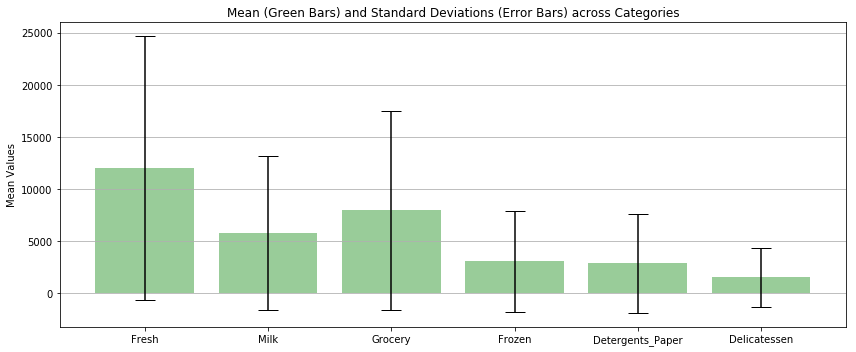

In [77]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.40,
       ecolor='black',
       capsize=10,color='green')
ax.set_ylabel('Mean Values')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean (Green Bars) and Standard Deviations (Error Bars) across Categories')
ax.yaxis.grid(True)
plt.tight_layout()

## Standard Deviation Approach

In [99]:
dict={}
for i in df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns:
    dict[i] = (round(df[i].std()))
pd.DataFrame(dict,index=['Standard Deviation']).T.sort_values(by='Standard Deviation')

,Standard Deviation
Delicatessen,2820
Detergents_Paper,4768
Frozen,4855
Milk,7380
Grocery,9503
Fresh,12647


## Variance Approach

In [98]:
dict={}
for i in df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns:
    dict[i] = (round(df[i].var()))
pd.DataFrame(dict,index=['Variance']).T.sort_values(by='Variance')

,Variance
Delicatessen,7952997
Detergents_Paper,22732436
Frozen,23567853
Milk,54469967
Grocery,90310104
Fresh,159954927


## CoVariance Approach

In [100]:
dict={}
for i in df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns:
    dict[i] = round(stats.variation(df[i]),2)
pd.DataFrame(dict,index=['Co-efficient of Variance']).T.sort_values('Co-efficient of Variance',ascending=False)

,Co-efficient of Variance
Delicatessen,1.85
Detergents_Paper,1.65
Frozen,1.58
Milk,1.27
Grocery,1.19
Fresh,1.05


## Five Point Summary

In [79]:
df.drop(['Buyer/Spender','Total_Spends'],axis=1).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Question 1.4

# 1.4. Are there any outliers in the data?

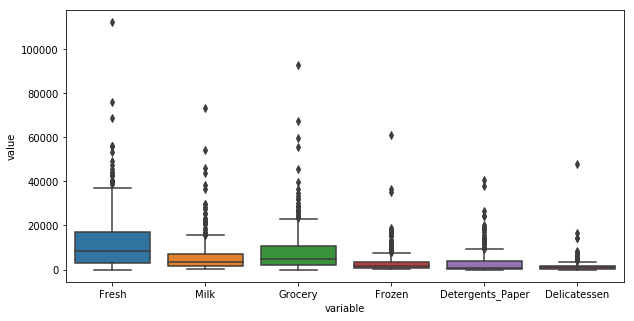

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1)))

## Univariate Analysis

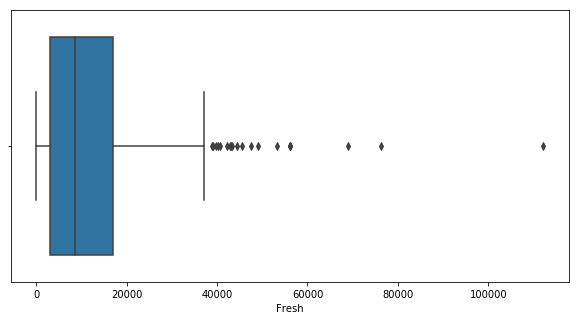

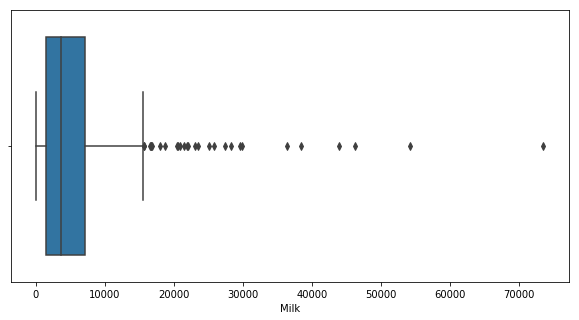

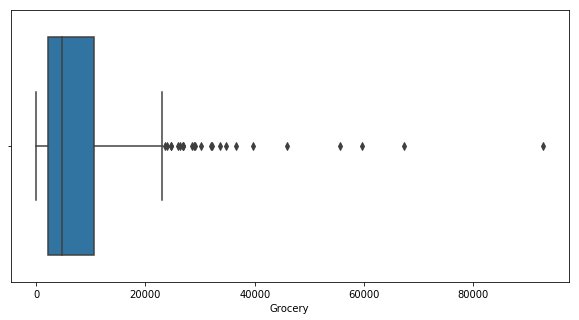

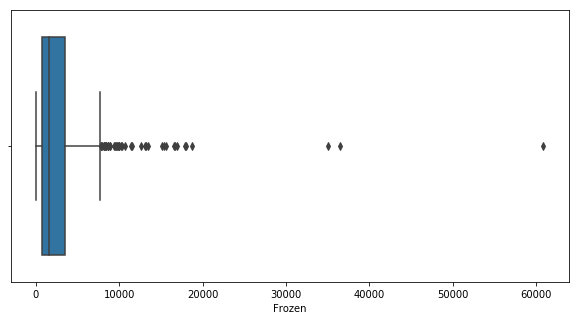

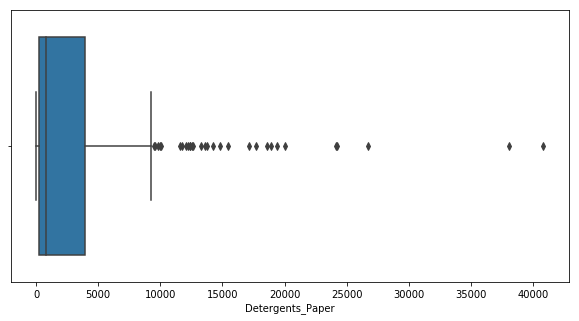

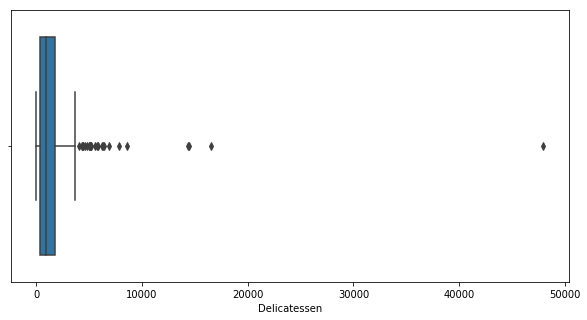

In [167]:
cols=df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns
for i in cols:
    plt.figure(figsize=(10,5))
    plt.clf()
    sns.boxplot(df[i])
    plt.savefig(i+'.png')

## BiVariate Analysis

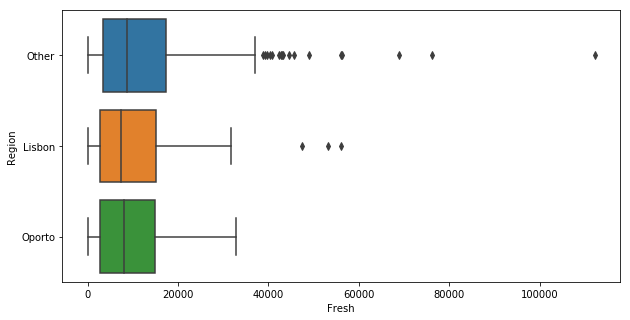

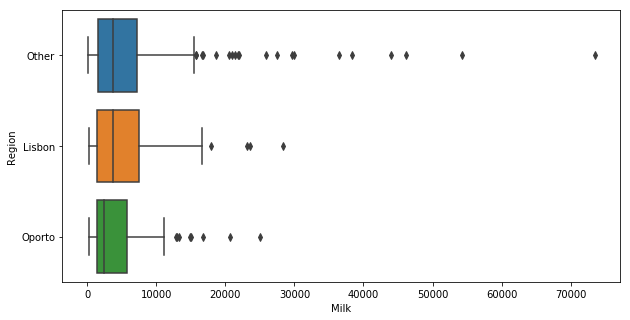

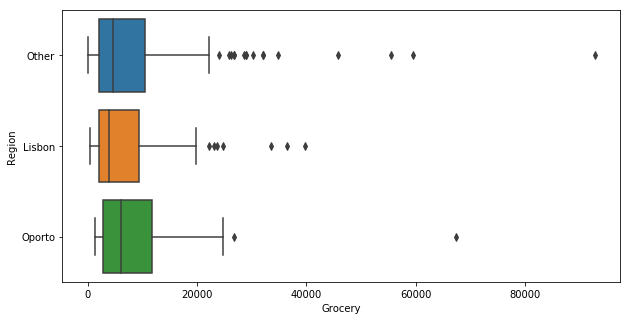

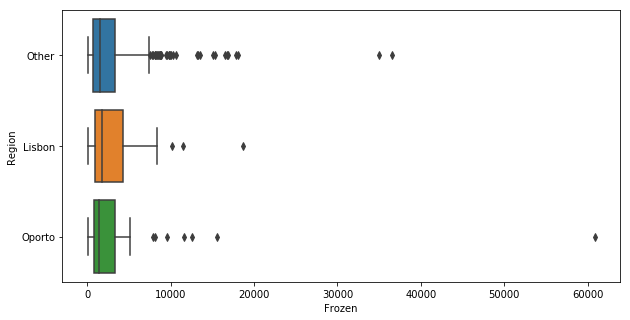

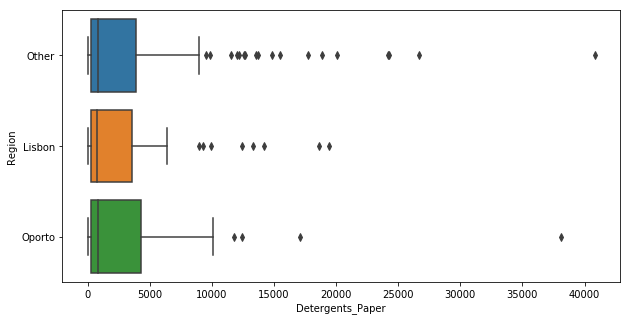

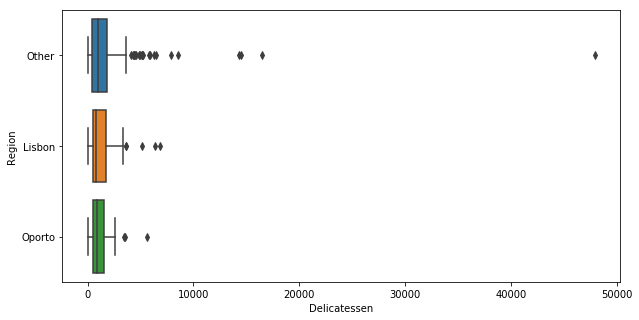

In [149]:
cols=df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns
for i in cols:
    plt.figure(figsize=(10,5))
    plt.clf()
    sns.boxplot(x=df[i],y=df['Region'])
    plt.savefig(i+'_Region_'+'BiVariate.png')

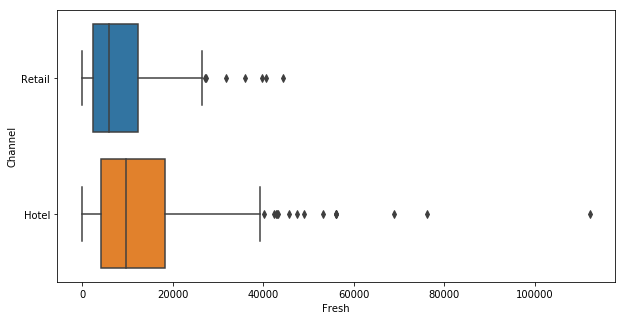

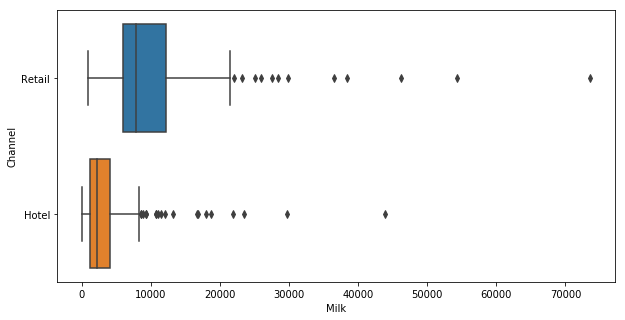

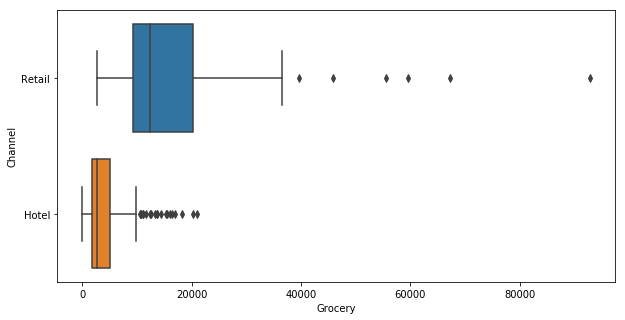

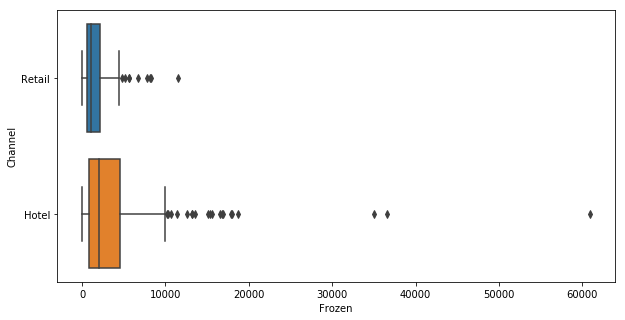

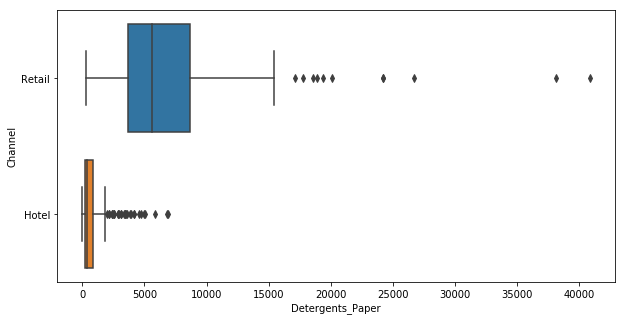

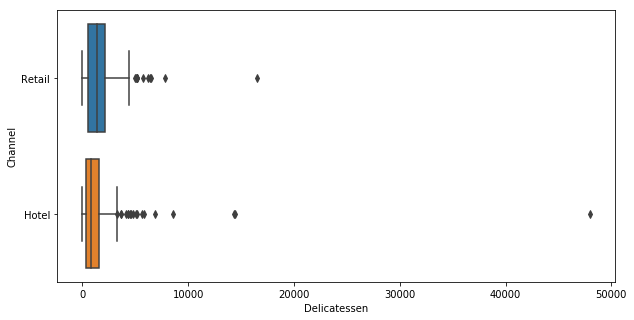

In [150]:
cols=df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns
for i in cols:
    plt.figure(figsize=(10,5))
    plt.clf()
    sns.boxplot(x=df[i],y=df['Channel'])
    plt.savefig(i+'_Channel_'+'BiVariate.png')

## MultiVariate Analysis

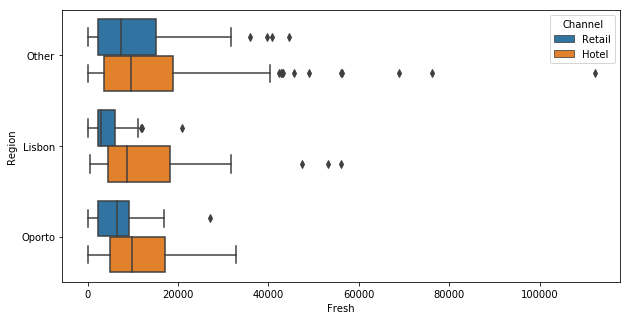

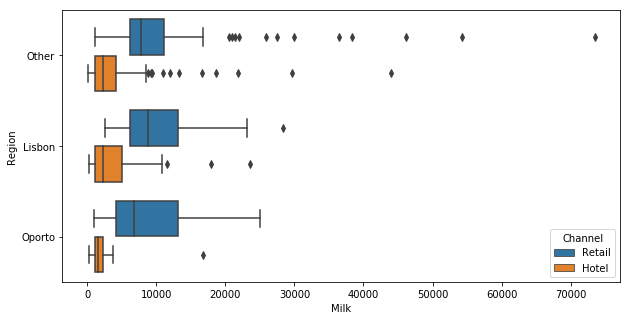

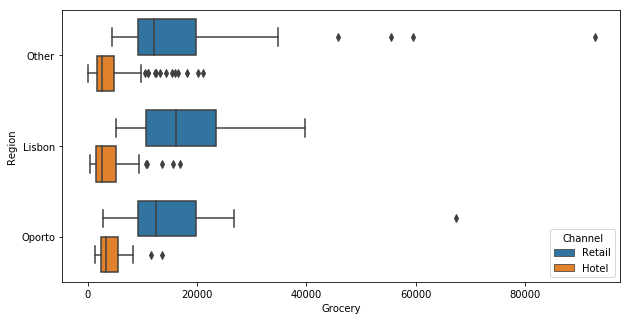

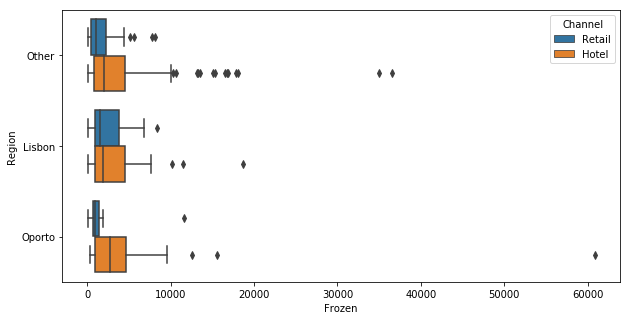

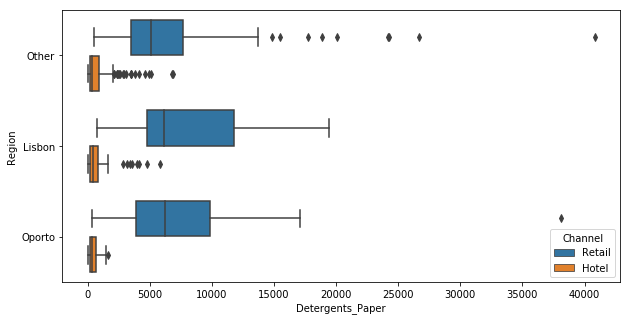

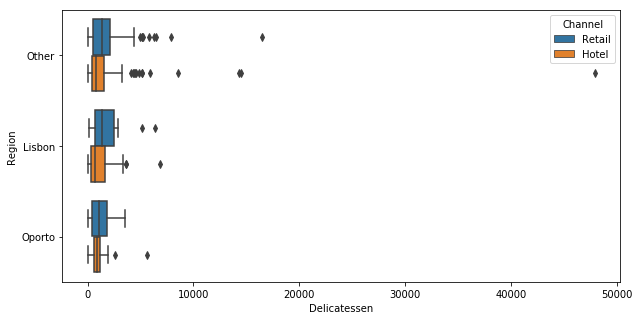

In [174]:
cols=df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns
for i in cols:
    plt.figure(figsize=(10,5))
    plt.clf()
    sns.boxplot(x=df[i],y=df['Region'],hue=df['Channel'])
    plt.savefig(i+'_Combined_'+'Hue_Channel_'+'BiVariate.png')

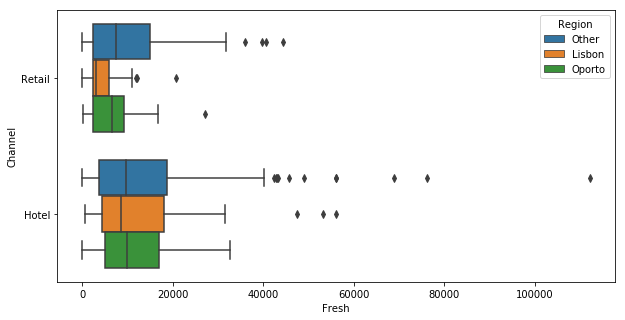

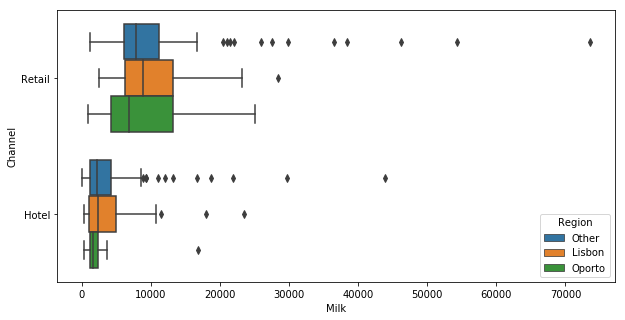

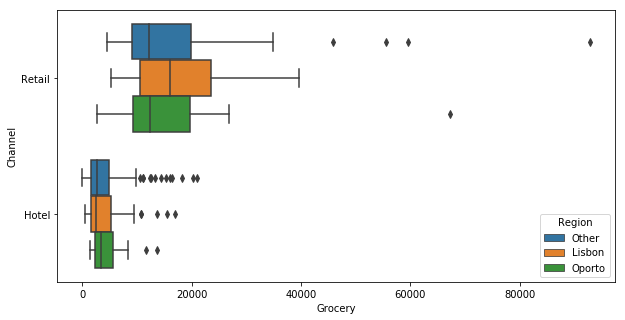

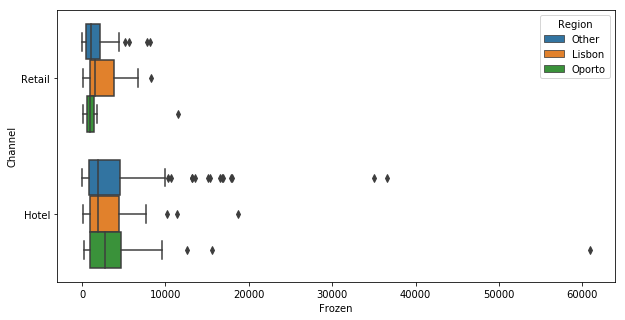

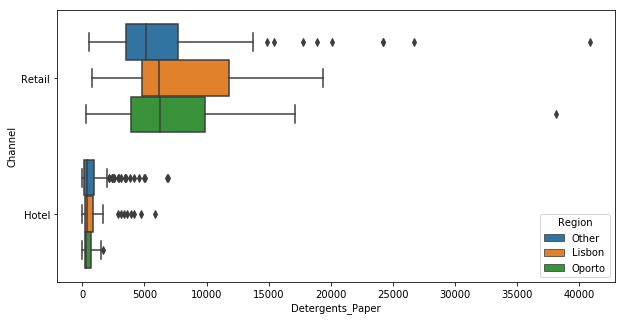

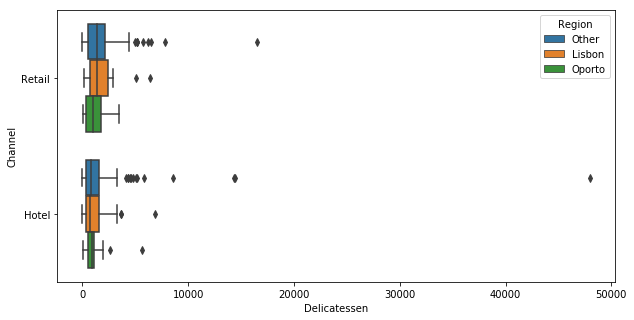

In [175]:
cols=df.drop(['Buyer/Spender','Channel','Region','Total_Spends'],axis=1).columns
for i in cols:
    plt.figure(figsize=(10,5))
    plt.clf()
    sns.boxplot(x=df[i],y=df['Channel'],hue=df['Region'])
    plt.savefig(i+'_Combined_'+'Hue_Region_'+'BiVariate.png')

### Outlier Count

In [151]:
df['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

In [171]:
#sns.boxplot(x=df[df['Category'] == 'Breakfast']['Category'],y=df['Calories'])
gp=df.groupby('Channel')
df3=pd.DataFrame(columns=['Channel','Outlier_Count'])
for i in df['Channel'].unique():
    gp_chnl=gp.get_group(i)
    lst=list(gp_chnl.columns)
    lst.remove('Channel')
    lst.remove('Region')
    lst.remove('Buyer/Spender')
    total=0
    for j in lst:
        q1,q3=np.percentile(gp_chnl[j],[25,75])
        q1,q3
        iqr=q3-q1
        iqr
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        upper,lower
        outlier_list=[]
        for k in gp_chnl[j]:
            if k < lower or k > upper:
                outlier_list.append(k)
                total=total+1
    list_of_params=[i,pd.to_numeric(total,errors='coerce')]
    list_of_params=pd.Series(list_of_params,df3.columns)
    #list_of_params=pd.to_numeric(list_of_params, errors='coerce')
    df3=df3.append(list_of_params,ignore_index=True)
df3.sort_values('Outlier_Count',ascending=False)

,Channel,Outlier_Count
1,Hotel,138
0,Retail,66


In [170]:
#sns.boxplot(x=df[df['Category'] == 'Breakfast']['Category'],y=df['Calories'])
gp=df.groupby('Region')
df4=pd.DataFrame(columns=['Region','Outlier_Count'])
for i in df['Region'].unique():
    gp_rgn=gp.get_group(i)
    lst=list(gp_rgn.columns)
    lst.remove('Channel')
    lst.remove('Region')
    lst.remove('Buyer/Spender')
    total=0
    for j in lst:
        q1,q3=np.percentile(gp_rgn[j],[25,75])
        q1,q3
        iqr=q3-q1
        iqr
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        upper,lower
        outlier_list=[]
        for k in gp_rgn[j]:
            if k < lower or k > upper:
                outlier_list.append(k)
                total=total+1
    list_of_params=[i,pd.to_numeric(total,errors='coerce')]
    list_of_params=pd.Series(list_of_params,df4.columns)
    #list_of_params=pd.to_numeric(list_of_params, errors='coerce')
    df4=df4.append(list_of_params,ignore_index=True)
df4.sort_values('Outlier_Count',ascending=False)

,Region,Outlier_Count
0,Other,141
1,Lisbon,33
2,Oporto,28


# Problem - 2

In [111]:
p2_df=pd.read_csv('Survey.csv')

In [112]:
p2_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [113]:
p2_df.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


In [114]:
p2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [115]:
p2_df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

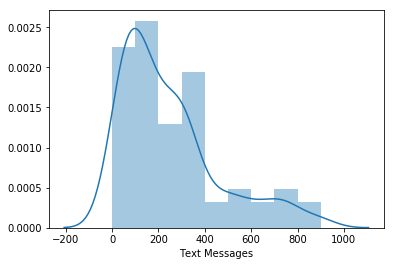

In [116]:
#sns.boxplot(p2_df['Text Messages'])
stats.skew(p2_df['Text Messages'])
sns.distplot(p2_df['Text Messages'])

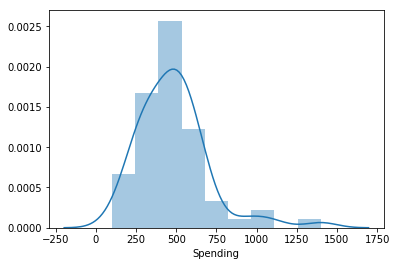

In [117]:
#sns.boxplot(p2_df['Spending'])
stats.skew(p2_df['Spending'])
sns.distplot(p2_df['Spending'])

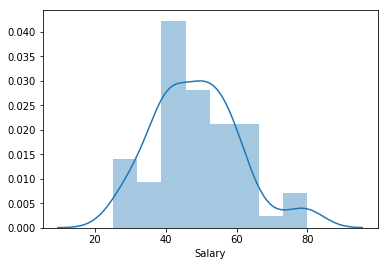

In [118]:
#sns.boxplot(p2_df['Salary'])
stats.skew(p2_df['Salary'])
sns.distplot(p2_df['Salary'])

# Part -1 

## Question - 2.1

##  2.1.1. Gender and Major

In [119]:
p2_df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

## Contingency Table

In [124]:
ct_gender_major=pd.crosstab(p2_df['Gender'],p2_df['Major'])
ct_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


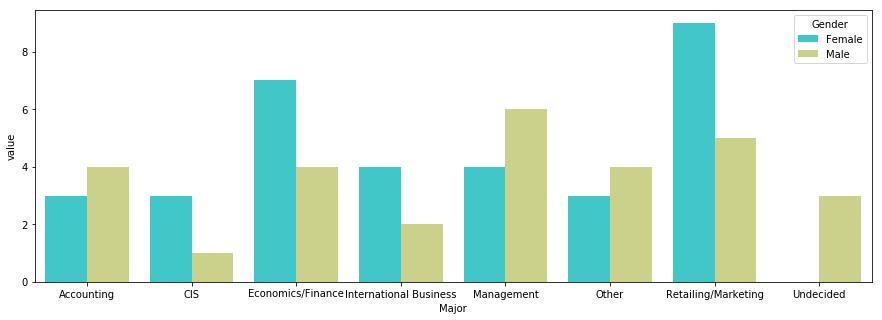

In [125]:
stacked = ct_gender_major.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
plt.figure(figsize=(15,5))
sns.barplot(x=stacked.Major, y=stacked.value, hue=stacked.Gender,palette='rainbow')

### Actual Contingency Table

In [127]:
ct_gender_major=pd.crosstab(p2_df['Gender'],p2_df['Major'],margins=True)
ct_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


## 2.1.2 Gender and Grad Intention

In [128]:
ct_gender_grad=pd.crosstab(p2_df['Gender'],p2_df['Grad Intention'])
ct_gender_grad

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


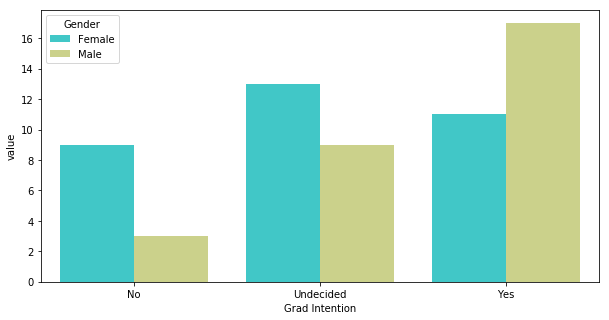

In [129]:
stacked = ct_gender_grad.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=stacked['Grad Intention'], y=stacked.value, hue=stacked.Gender,palette='rainbow')

### Actual Contingency Table

In [132]:
ct_gender_grad=pd.crosstab(p2_df['Gender'],p2_df['Grad Intention'],margins=True)
ct_gender_grad

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


## 2.1.3. Gender and Employment

In [133]:
ct_gender_emp=pd.crosstab(p2_df['Gender'],p2_df['Employment'])
ct_gender_emp

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


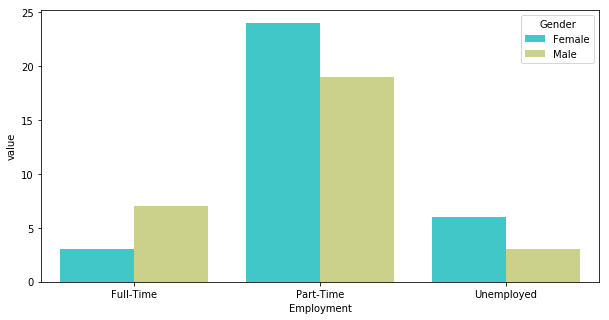

In [134]:
stacked = ct_gender_emp.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=stacked['Employment'], y=stacked.value, hue=stacked.Gender,palette='rainbow')

### Actual Contigency Table

In [135]:
ct_gender_emp=pd.crosstab(p2_df['Gender'],p2_df['Employment'],margins=True)
ct_gender_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


## 2.1.4. Gender and Computer

In [136]:
ct_gender_comp=pd.crosstab(p2_df['Gender'],p2_df['Computer'])
ct_gender_comp

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


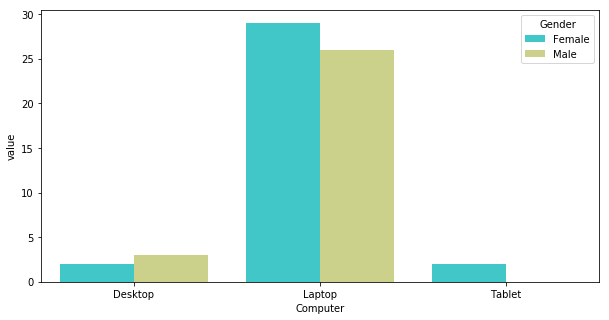

In [137]:
stacked = ct_gender_comp.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=stacked['Computer'], y=stacked.value, hue=stacked.Gender,palette='rainbow')

### Actual Contingency Table

In [138]:
ct_gender_comp=pd.crosstab(p2_df['Gender'],p2_df['Computer'],margins=True)
ct_gender_comp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## Question - 2.2

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?
### What is the probability that a randomly selected CMSU student will be female?

In [88]:
temp_df=pd.DataFrame(p2_df['Gender'].value_counts())
female_count=temp_df['Gender'][0]
male_count=temp_df['Gender'][1]
total_count=female_count+male_count

In [185]:
prob_of_male=male_count/total_count
prob_of_male
print('Probability that a randomly selected CMSU student will be male is {} % '.format(round(prob_of_male*100),2))

Probability that a randomly selected CMSU student will be male is 47.0 % 


In [186]:
prob_of_female=female_count/total_count
prob_of_female
print('Probability that a randomly selected CMSU student will be male is {} % '.format(round(prob_of_female*100),2))

Probability that a randomly selected CMSU student will be male is 53.0 % 


### 2.2.2. Find the conditional probability of different majors among the male students in CMSU.
### Find the conditional probability of different majors among the female students of CMSU.

In [139]:
ct_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [140]:
list_of_probs_female_df=pd.DataFrame([list_of_probs_female],index=['Female'])
list_of_probs_female_df

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Female,9.09,9.09,21.21,12.12,12.12,9.09,27.27,0.0,100.0


In [142]:
prob_gender_major_df=pd.DataFrame(columns=ct_gender_major.columns)

list_of_probs_female=[]
for col in ct_gender_major.columns:
    prob_female = (ct_gender_major.loc['Female'][col]/
                   ct_gender_major.loc['Female']['All'])
    list_of_probs_female.append(round(prob_female*100,2))
list_of_probs_female
list_of_probs_female = pd.Series(list_of_probs_female,prob_gender_major_df.columns)
list_of_probs_female_df=pd.DataFrame([list_of_probs_female],index=['Female'])
prob_gender_major_df=pd.concat([prob_gender_major_df,list_of_probs_female_df])

list_of_probs_male=[]
for col in ct_gender_major.columns:
    prob_male = (ct_gender_major.loc['Male'][col]/
                   ct_gender_major.loc['Male']['All'])
    list_of_probs_male.append(round(prob_male*100,2))
list_of_probs_male
list_of_probs_male = pd.Series(list_of_probs_male,prob_gender_major_df.columns)
list_of_probs_male_df=pd.DataFrame([list_of_probs_male],index=['Male'])
prob_gender_major_df=pd.concat([prob_gender_major_df,list_of_probs_male_df])

prob_gender_major_df

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Female,9.09,9.09,21.21,12.12,12.12,9.09,27.27,0.00,100.0
Male,13.79,3.45,13.79,6.90,20.69,13.79,17.24,10.34,100.0


### 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
### Find the conditional probability of intent to graduate, given that the student is a female.

In [143]:
ct_gender_grad

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [145]:
prob_gender_grad_df=pd.DataFrame(columns=ct_gender_grad.columns)

list_of_probs_female=[]
for col in ct_gender_grad.columns:
    prob_female = (ct_gender_grad.loc['Female'][col]/
                   ct_gender_grad.loc['Female']['All'])
    list_of_probs_female.append(round(prob_female*100,2))
list_of_probs_female
list_of_probs_female = pd.Series(list_of_probs_female,prob_gender_grad_df.columns)
list_of_probs_female_df=pd.DataFrame([list_of_probs_female],index=['Female'])
prob_gender_grad_df=pd.concat([prob_gender_grad_df,list_of_probs_female_df])

list_of_probs_male=[]
for col in ct_gender_grad.columns:
    prob_male = (ct_gender_grad.loc['Male'][col]/
                   ct_gender_grad.loc['Male']['All'])
    list_of_probs_male.append(round(prob_male*100,2))
list_of_probs_male
list_of_probs_male = pd.Series(list_of_probs_male,prob_gender_grad_df.columns)
list_of_probs_male_df=pd.DataFrame([list_of_probs_male],index=['Male'])
prob_gender_grad_df=pd.concat([prob_gender_grad_df,list_of_probs_male_df])

prob_gender_grad_df

Grad Intention,No,Undecided,Yes,All
Female,27.27,39.39,33.33,100.0
Male,10.34,31.03,58.62,100.0


### 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

## Consider Male and Female as one entity and solve this problem

In [146]:
ct_gender_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [147]:
prob_gender_emp_df=pd.DataFrame(columns=ct_gender_emp.columns)

list_of_probs_female=[]
for col in ct_gender_emp.columns:
    prob_female = (ct_gender_emp.loc['Female'][col]/
                   ct_gender_emp.loc['Female']['All'])
    list_of_probs_female.append(round(prob_female*100,2))
list_of_probs_female
list_of_probs_female = pd.Series(list_of_probs_female,prob_gender_emp_df.columns)
list_of_probs_female_df=pd.DataFrame([list_of_probs_female],index=['Female'])
prob_gender_emp_df=pd.concat([prob_gender_emp_df,list_of_probs_female_df])

list_of_probs_male=[]
for col in ct_gender_emp.columns:
    prob_male = (ct_gender_emp.loc['Male'][col]/
                   ct_gender_emp.loc['Male']['All'])
    list_of_probs_male.append(round(prob_male*100,2))
list_of_probs_male
list_of_probs_male = pd.Series(list_of_probs_male,prob_gender_emp_df.columns)
list_of_probs_male_df=pd.DataFrame([list_of_probs_male],index=['Male'])
prob_gender_emp_df=pd.concat([prob_gender_emp_df,list_of_probs_male_df])

prob_gender_emp_df

Employment,Full-Time,Part-Time,Unemployed,All
Female,9.09,72.73,18.18,100.0
Male,24.14,65.52,10.34,100.0


### 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [148]:
ct_gender_comp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [149]:
prob_gender_comp_df=pd.DataFrame(columns=ct_gender_comp.columns)

list_of_probs_female=[]
for col in ct_gender_comp.columns:
    prob_female = (ct_gender_comp.loc['Female'][col]/
                   ct_gender_comp.loc['Female']['All'])
    list_of_probs_female.append(round(prob_female*100,2))
list_of_probs_female = pd.Series(list_of_probs_female,prob_gender_comp_df.columns)
list_of_probs_female_df=pd.DataFrame([list_of_probs_female],index=['Female'])
prob_gender_comp_df=pd.concat([prob_gender_comp_df,list_of_probs_female_df])

list_of_probs_male=[]
for col in ct_gender_comp.columns:
    prob_male = (ct_gender_comp.loc['Male'][col]/
                   ct_gender_comp.loc['Male']['All'])
    list_of_probs_male.append(round(prob_male*100,2))
list_of_probs_male = pd.Series(list_of_probs_male,prob_gender_comp_df.columns)
list_of_probs_male_df=pd.DataFrame([list_of_probs_male],index=['Male'])
prob_gender_comp_df=pd.concat([prob_gender_comp_df,list_of_probs_male_df])

prob_gender_comp_df

Computer,Desktop,Laptop,Tablet,All
Female,6.06,87.88,6.06,100.0
Male,10.34,89.66,0.00,100.0


In [150]:
pd.DataFrame(prob_gender_comp_df['Laptop'])

,Laptop
Female,87.88
Male,89.66


## Question 2.3

# not just chi square test but also comment based on probabilites calculated above

# Gender and Major Independence

In [98]:
ct_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [101]:
#H0 --> gender and Major are independent
#Ha --> gender and major are not independent

In [103]:
chi,p_val,dof,freq=stats.chi2_contingency(ct_gender_major)
p_val

0.9715908321742914

In [104]:
p_val<0.05

False

In [105]:
#Fail to reject null hypothesis
#Hence Gender & Major are independent

In [197]:
#P(Acc/Male)= P(Male)
#0.1379 != 0.4677

p_acc_male = 4/29
p_male = 29/62

if p_acc_male == prob_male:
    print('Major is independent of Gender')
else:
    print('Major is dependent on Gender')

#Hence acc is dependent on gender

Major is dependent on Gender


# Gender and Graduate Independance

In [106]:
ct_gender_grad

Grad Intention,No,Undecided,Yes,Total
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [107]:
#H0 --> gender and Grad are independent
#Ha --> gender and Grad are not independent

In [108]:
chi,p_val,dof,freq=stats.chi2_contingency(ct_gender_grad)
p_val

0.5730045697409691

In [109]:
p_val<0.05

False

In [110]:
#Fail to reject null hypothesis
#Hence Gender & Grad are independent

In [198]:
p_no_male = 3/29
p_male = 29/62


if p_no_male == p_male:
    print('Grad intention is independent of Gender')
else:
    print('Grad intention is dependent on Gender')

Grad intention is dependent on Gender


# Gender and Employment Independance

In [111]:
ct_gender_emp

Employment,Full-Time,Part-Time,Unemployed,Total
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [ ]:
P(FT/Male) = P(FT)
0.2413 != 0.1612

In [390]:
10/62

0.16129032258064516

In [112]:
#H0 --> gender and employment are independent
#Ha --> gender and employment are not independent

In [113]:
chi,p_val,dof,freq=stats.chi2_contingency(ct_gender_emp)
p_val

0.8168915124034939

In [114]:
p_val<0.05

False

In [115]:
#Fail to reject null hypothesis
#Hence Gender & employment are independent

In [200]:
p_Full_male = 7/29
p_male = 29/62


if p_Full_male == p_male:
    print('Employment is independent of Gender')
else:
    print('Employment is dependent on Gender')

Employment is dependent on Gender


# Gender and Laptop Independance

In [116]:
ct_gender_comp

Computer,Desktop,Laptop,Tablet,Total
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [117]:
#H0 --> gender and laptop are independent
#Ha --> gender and laptop are not independent

In [118]:
chi,p_val,dof,freq=stats.chi2_contingency(ct_gender_comp)
p_val

0.9088848182816986

In [119]:
p_val<0.05

False

In [120]:
#Fail to reject null hypothesis
#Hence Gender & laptop are independent

In [201]:
p_laptop_male = 26/29
p_male = 29/62


if p_laptop_male == p_male:
    print('Laptop is independent of Gender')
else:
    print('Laptop is dependent on Gender')

Laptop is dependent on Gender


## Question 2.4

In [673]:
p2_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


# Salary

### H0 --> Salary belongs to Normal Dist.
### Ha --> Salary does not belong to Normal Dist

## Distplot

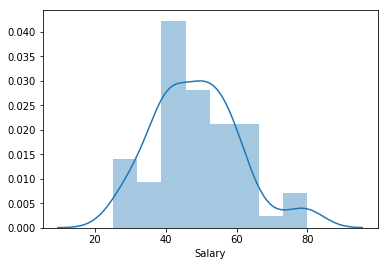

In [206]:
sns.distplot(p2_df['Salary'])
plt.show()

In [228]:
print('Mean of Salary is {}'.format(p2_df['Salary'].mean()))
print('Median of Salary is {}'.format(p2_df['Salary'].median()))
print('Mode of Salary is {}'.format(p2_df['Salary'].mode()))

Mean of Salary is 48.54838709677419
Median of Salary is 50.0
Mode of Salary is 0    40.0
dtype: float64


## histogram

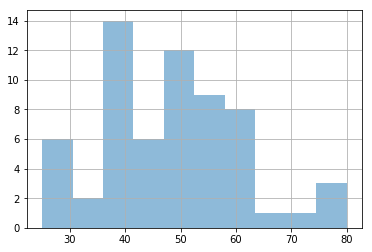

In [719]:
p2_df['Salary'].hist(alpha=0.5)

## QQPLot

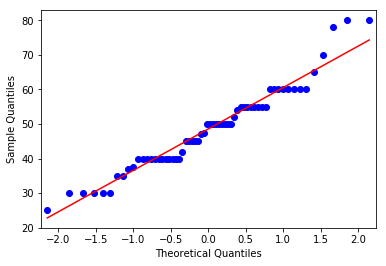

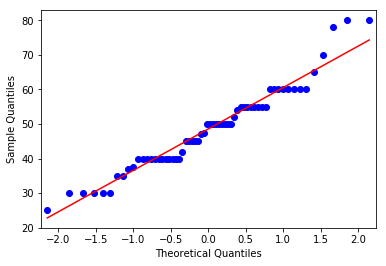

In [707]:
qqplot(p2_df['Salary'],line='s')

## Normaility Test

In [202]:
k2,p=stats.normaltest(p2_df['Salary'])
k2,p

(3.84580947969415, 0.14618172494628334)

In [203]:
p<0.05

False

In [ ]:
#Fail to reject Null hypothesis
#Hence Salary belong to Normal Dist. as per normal test

## Using Anderson Test

In [764]:
result=stats.anderson(p2_df['Salary'], dist='norm')
result

AndersonResult(statistic=0.7785880730481622, critical_values=array([0.544, 0.62 , 0.744, 0.868, 1.032]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [765]:
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.779
15.000: 0.544, data does not look normal (reject H0)
10.000: 0.620, data does not look normal (reject H0)
5.000: 0.744, data does not look normal (reject H0)
2.500: 0.868, data looks normal (fail to reject H0)
1.000: 1.032, data looks normal (fail to reject H0)


## Shaprio + Wilcoxon

In [160]:
stat,p_val=stats.shapiro(p2_df['Salary'])
stat,p_val

(0.9565856456756592, 0.028000956401228905)

In [217]:
p_val<0.05

True

In [161]:
wil_stat,p_val=stats.wilcoxon(p2_df['Salary'])
p_val

6.919576320434133e-12

In [210]:
p_val<0.05

True

In [ ]:
# As per Shapiro + Wilcoxon approach salary does not belong to normal dist.

# Spending

## Distplot

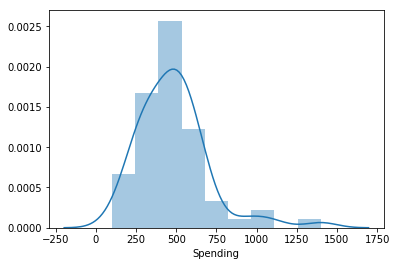

In [708]:
sns.distplot(p2_df['Spending'])
plt.show()

In [229]:
print('Mean of Spending is {}'.format(p2_df['Spending'].mean()))
print('Median of Spending is {}'.format(p2_df['Spending'].median()))
print('Mode of Spending is {}'.format(p2_df['Spending'].mode()))

Mean of Spending is 482.01612903225805
Median of Spending is 500.0
Mode of Spending is 0    500
dtype: int64


## Histogram

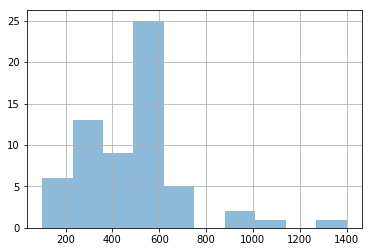

In [718]:
p2_df['Spending'].hist(alpha=0.5)

## QQPlot

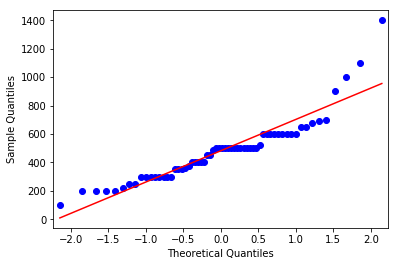

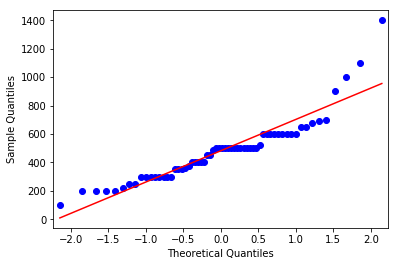

In [709]:
qqplot(p2_df['Spending'],line='s')

## Using Normality Test

In [ ]:
H0 --> Spending belongs to Normal Dist.
Ha --> Spending does not belong to Normal Dist

In [699]:
k2,p=stats.normaltest(p2_df['Spending'])
k2,p

(30.49562450314631, 2.387587398454289e-07)

In [701]:
p<0.01

True

In [ ]:
#Reject Null hypothesis
#Spending does not belong to Normal dist.

#### Reject Null hypothesis
#### Hence Spending does not belong to normal dist.

## Using Anderson Test

In [761]:
result=stats.anderson(p2_df['Spending'], dist='norm')
result

AndersonResult(statistic=1.7540896098483572, critical_values=array([0.544, 0.62 , 0.744, 0.868, 1.032]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [762]:
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.754
15.000: 0.544, data does not look normal (reject H0)
10.000: 0.620, data does not look normal (reject H0)
5.000: 0.744, data does not look normal (reject H0)
2.500: 0.868, data does not look normal (reject H0)
1.000: 1.032, data does not look normal (reject H0)


In [740]:
#This means it lies in rejection region, hence reject the null hypothesis.
#Hence Spending does not belong to normal distribution

#### Reject Null hypothesis
#### Hence Spending does not belong to normal dist.

## Shapiro + Wilcoxon

In [162]:
stat,p_val=stats.shapiro(p2_df['Spending'])
stat,p_val

(0.8777452111244202, 1.6854661225806922e-05)

In [163]:
p_val<0.01

True

In [165]:
w,p_val=stats.wilcoxon(p2_df['Spending'])
w,p_val

(0.0, 6.838058582265292e-12)

In [167]:
p_val<0.05

True

## Hence Spending is NOT Normal

# Text Messages

## Distplot

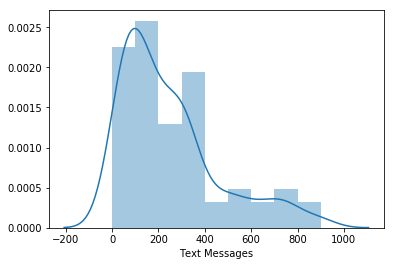

In [710]:
sns.distplot(p2_df['Text Messages'])
plt.show()

In [230]:
print('Mean of Text Messages is {}'.format(p2_df['Text Messages'].mean()))
print('Median of Text Messages is {}'.format(p2_df['Text Messages'].median()))
print('Mode of Text Messages is {}'.format(p2_df['Text Messages'].mode()))

Mean of Text Messages is 246.20967741935485
Median of Text Messages is 200.0
Mode of Text Messages is 0    300
dtype: int64


## Histogram

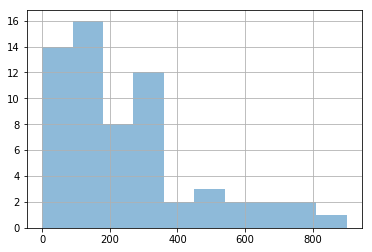

In [717]:
p2_df['Text Messages'].hist(alpha=0.5)

## QQ Plot

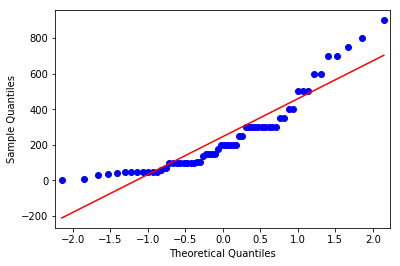

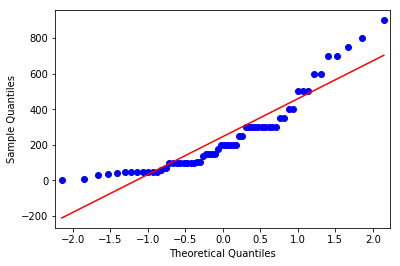

In [721]:
qqplot(p2_df['Text Messages'],line='s')

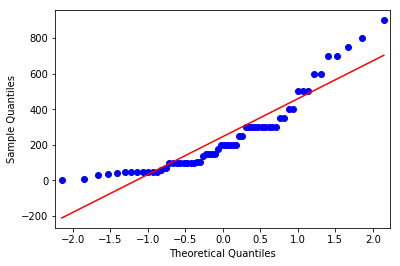

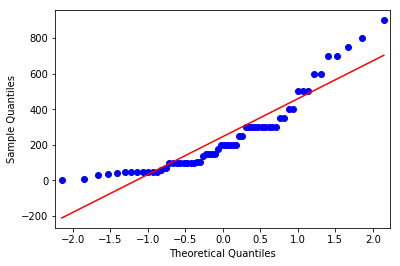

In [720]:
qqplot(p2_df['Text Messages'],loc=p2_df['Text Messages'].mean(),scale=p2_df['Text Messages'].std(),line='s')

## Normality Test

In [ ]:
#H0 --> Text Messages  belongs to Normal Dist.
#Ha --> Text Messages does not belong to Normal Dist

In [702]:
k2,p=stats.normaltest(p2_df['Text Messages'])
k2,p

(16.34755294390911, 0.0002819512224692029)

In [703]:
p<0.01

True

#### Reject Null hypothesis
#### Hence Text Messages also does not belong to normal dist.

## Using Anderson Test

In [766]:
result=stats.anderson(p2_df['Text Messages'], dist='norm')
result

AndersonResult(statistic=2.8189960604452153, critical_values=array([0.544, 0.62 , 0.744, 0.868, 1.032]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [767]:
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.819
15.000: 0.544, data does not look normal (reject H0)
10.000: 0.620, data does not look normal (reject H0)
5.000: 0.744, data does not look normal (reject H0)
2.500: 0.868, data does not look normal (reject H0)
1.000: 1.032, data does not look normal (reject H0)


In [ ]:
#This means it lies in rejection region, hence reject the null hypothesis.
#Hence Text messages do not belong to normal distribution

#### Reject Null hypothesis
#### Hence Text Messages also does not belong to normal dist.

## Shaprio + Wilcoxon

In [168]:
stat,p_val=stats.shapiro(p2_df['Text Messages'])
stat,p_val

(0.8594191074371338, 4.324040673964191e-06)

In [169]:
p_val<0.01

True

In [170]:
w,pval=stats.wilcoxon(p2_df['Text Messages'])
w,pval

(0.0, 1.0553057563033918e-11)

In [171]:
pval<0.05

True

## Hence Text Messages is NOT Normal

# Problem 3

In [175]:
p3_df=pd.read_csv('A & B shingles.csv')

In [176]:
p3_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [177]:
p3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 656.0 bytes


In [178]:
p3_df.describe(include='all')

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


# 3.1

In [172]:
U=0.35
n_a=36
dof_a=n_a-1
n_b=31
dof_b=n_b-1

In [174]:
#H0--> U >= 0.35
#Ha--> U < 0.35

## A Shingles

In [179]:
tstat_A,p_val_A=stats.ttest_1samp(p3_df['A'],U)
tstat_A,p_val_A

(-1.4735046253382782, 0.14955266289815025)

In [180]:
p_val_A<0.05

False

In [789]:
#Fail to reject, Hence U >=0.35

## B Shingles

In [185]:
tstat_B,p_val_B=stats.ttest_1samp(p3_df['B'],U,nan_policy='omit')
tstat_B,p_val_B

(-3.1003313069986995, 0.004180954800638365)

In [182]:
p3_df.isnull().sum()

A    0
B    5
dtype: int64

In [183]:
p_val_B<0.05

True

In [184]:
#reject null hypothesis, Hence U<0.35

### 3.3. Do you think that the population means for shingles A and B are equal?
### Form the hypothesis and conduct the test of the hypothesis.
### What assumption do you need to check before the test for equality of means is performed?

In [811]:
#H0 --> Ua = Ub
#Ha --> Ua != Ub

## Check for Variance Assumption

In [189]:
p3_df['A'].var()

0.018422857142857133

In [190]:
p3_df['B'].var()

0.018850322580645163

## Actual ttest_ind

In [193]:
t_stat,p_value=ttest_ind(p3_df['A'],p3_df['B'],nan_policy='omit',equal_var=True)
t_stat,p_value

(1.2896282719661123, 0.2017496571835306)

In [187]:
p_value<0.05

False

In [188]:
# Fail to reject null hypothesis
# Accept null hypothesis
# Ua = Ub